<img src="https://imgs.search.brave.com/nAN7oz_7Lp8wj8rE-mskHnfOvhevF5v56ZXkqOwjbKc/rs:fit:500:0:0:0/g:ce/aHR0cHM6Ly9zMy5l/dS13ZXN0LTMuYW1h/em9uYXdzLmNvbS9t/b292aWpvYi5wcm9k/LzI0NjUyOTAvbGdf/Y2VzaS1qYXVuZS5w/bmc" style="height:100px;">


# <center> <strong> Project Smart Mobility and Route Optimization </center>

# <center> Modelisation Delivrable

**Group 2** :
- Jeremy LE FOULON
- Andrew KINUTHIA
- Adnan CYUSA


 Date : 17/10/24




# <center> Introduction

## Context

ADEME, the french environment and energy managment agency, launched a call to test mobility solutions for people and goods in different areas, and our CesiCDP structure is well established in the field.

Being part of the team in charge of answering ADEME's call, we focus on the managment of delivery routes, as decided by CesiCDP.

Our primary goal is to be able to calculate, on a road network, a set of routes that connect a subset of cities between each other before returning to the starting point, all while minimizing the total duration of the route. A given city must be traversed by exactly one route of that set of routes.

However, in order to make our problem more realistic and get ADEME's full attention, we decided to add additional constraints.

<!--The aim of ADEME's call is to apply advanced optimization techniques to solve a real-world logistics challenge, that is focusing on optimizing delivery routes with various constraints such as time windows, vehicle capacities, and traffic considerations. The goal of this project is to develop a robust and innovative solution that aligns with ADEME's objectives for sustainable mobility and secures new markets with attractive financing schemes. The proposed approach involves defining the problem scope, developing the VRP model, implementing the solution, and validating and refining the approach based on real-world data and feedback.

The previous paragraph is to be removed, but I kept it just in case we need information and formulations from it. IT SHOULD BE REMOVED BEFORE SENDING THE DELIVERABLE.
-->

## Issue

How to determine a set of routes, where all cities are visited exactly once such that each route goes back to the starting point (origin) and the date when the last truck returns to the origin is mininmized?

## Constraints

- Truck capacity
- Cost of path
- Collection points

## Assumptions

- $k$ trucks are simultaneously available
- The time at which the last truck returns to base is to be minimized

<!--## Hypotheses

- Subset of constraints
- incremententing reduce old problem to new problem
- TSP (weighted and complete graph)
- Total cost of cycle / path i.e Payoff / cost matrix
- VRP problem
- TSP $\in$ NP-Hard
- TSP can be reduced to an instance of B, this instance of B is at least as hard as TSP.-->


## VRP

**What is VRP?**

Vehicle Routing Problem (VRP) is a classical combinational optimization problem that involves determining the most optimal/ minimum-cost set of routes for a fleet of vehicles with known vehicle capacities from a central depot to serve a given set of geographically dispersed customers who are served once, with the objective of minimizing total cost/ distance/ distribution cost travelled with satisfying some constraints (Azzahra Zayyan Firdaus ,2023).

VRP is a *NP-HARD* problem (Said Elatar et al., 2023) and has many variants corresponding to different real-world problems.

We believe our problem has its roots in Travelling Salesman problem (TSP) because VRP is an extension of TSP. This is why we believe so:


1.   **Multiple Vehicles:** TSP is typically about finding the shortest route for a single "salesman" to visit a series of locations and return to the starting point. VRP extends this by incorporating multiple vehicles that need to cover different parts of a network, each starting and ending at a central depot.
2.   **Capacity Constraints:** In TSP, there’s no limit on the amount of goods the salesman can carry. VRP, on the other hand, often includes capacity constraints on the vehicles. Each vehicle can carry only a certain amount of goods, and this limit impacts route planning, as the solution must balance the load across the fleet.
3. **Minimizing Total Cost:** While TSP generally focuses on minimizing travel distance or time for a single route, VRP optimizes the combined cost across multiple vehicles. Costs can include distance, fuel consumption, labor, and other factors associated with a fleet rather than a single route.
4. **Route Balancing:** VRP often considers balancing workloads among the vehicles, unlike TSP, where only a single route is optimized. This requirement ensures that no single vehicle is overburdened or underutilized.

Thus, with our case being a more real-life problem, VRP is more applicable to logistics, distribution, and supply chain scenarios, where real-world constraints make the simpler TSP model insufficient.






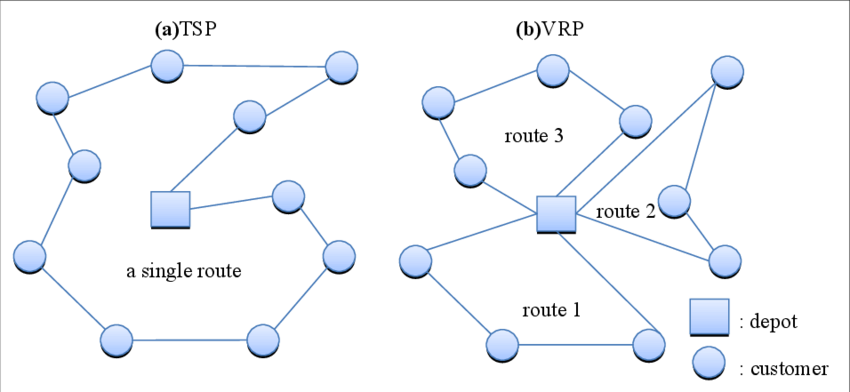

# <center> Modelisation of the problem

## Representation of the problem in a formal way

**Data**:
- Complete, weighted and undirected graph $G(V,E)$ with $V$ being the vertices, $E$ being the edges
- The starting point $u $$ \in $$ V$
- N° of trucks $k $$ \in \mathbb {N}$$ $
- Threshold $q $$ \in \mathbb {R}$$ $
  
**Decision problem** : $(P1)$ Can we find a set of cycles $S$ in $G$, one for each of the $k$ trucks, all starting from $u$, where each vertex in V is traversed by exactly one cycle in $S$, with $l$ being the length of the longest path in $S$, such that $l < q$ ?

**Data**:
- Complete, weighted and undirected graph $G(V,E)$ with $V$ being the vertices, $E$ being the edges
- The starting point $u $$ \in $$ V$
- N° of trucks $k $$ \in \mathbb{N}$$ $

**Optimisation problem** : What is the smallest $q$ where $(P1)$ is true?

## Identification of variables

<!--### Fixed variables

- Time slot ($t$)
Time slots are not included in our mathematical model
-->

### Unfixed variables

- Cost of edge between $i$ and $j$: ($d{\scriptscriptstyle ij}$)
- Truck capacity ($T$)

### Identification Vertices vs Edges

Below is a table showing what constraints that affects either the vertices or the edges :

| Vertices | Edges |
|----------|----------|
| Traffic | Time slot |
| Total cost |Types of items |

### Complexity analysis

#### TSP is NP-Hard

The TSP is formally defined as follows:

Given a complete weighted graph $ G = (V, E) $ with vertices $ V = \{v_1, v_2, ..., v_n\} $ and edges \( $E$ \) with weights $( w: E \rightarrow \mathbb{R}^+ )$, find a Hamiltonian cycle (a cycle that visits each vertex exactly once) with the minimum total weight.

TSP is known to be NP-Hard. This means that if we could solve TSP in polynomial time, we could solve any problem in NP in polynomial time [9].

#### Reduction of TSP to VRP

To show that VRP is at least as hard as TSP, we perform a reduction from TSP to VRP.

1. **Instance of TSP**:
   - Let $ G = (V, E) $ be a complete weighted graph with $( n )$ vertices.
   - The distance between vertices $( v_i )$ and $( v_j )$ is given by $( d_{ij} $).

2. **Reduction to VRP**:
   - Create a VRP instance with the same set of vertices $V$ .
   - Set the depot $( v_1 )$ as the starting and ending point.
   - Assume there is only one vehicle with sufficient capacity to visit all vertices.
   - The objective is to find the shortest route that visits all vertices and returns to the depot.

Formally, the VRP instance can be defined as:
- **Vertices**: $ V = \{v_1, v_2, ..., v_n\} $
- **Depot**: $( v_1 $)
- **Vehicle Capacity**: Sufficient to visit all vertices
- **Objective**: Minimize the total distance traveled

The reduction is straightforward:
- The TSP instance is directly transformed into a VRP instance with one vehicle.
- The optimal solution to the VRP instance (with one vehicle) is the same as the optimal solution to the TSP instance.

#### Example

Consider a simple example to illustrate the reduction:

1. **TSP Instance**:
   - Vertices: $ V = \{v_1, v_2, v_3, v_4\} $

   - Distance matrix $( D )$:
     \
     D = \begin{pmatrix}
     0 & 10 & 15 & 20 \\
     10 & 0 & 35 & 25 \\
     15 & 35 & 0 & 30 \\
     20 & 25 & 30 & 0
     \end{pmatrix}
     

2. **Reduction to VRP**:
   - Depot: $( v_1 $)
   - Vehicle Capacity: Sufficient to visit all vertices
   - Objective: Minimize the total distance traveled

The VRP instance is essentially the same as the TSP instance, with the depot $( v_1 $) and one vehicle that must visit all vertices and return to the depot.

#### Optimal Solution

For the given distance matrix, the optimal TSP solution (and thus the optimal VRP solution with one vehicle) might be:
- Route: $( v_1 \rightarrow v_2 \rightarrow v_3 \rightarrow v_4 \rightarrow v_1 $)
- Total Distance: $( 10 + 35 + 30 + 20 = 95 $)

This example shows that solving the VRP instance with one vehicle is equivalent to solving the TSP instance.

In conclusion, since TSP is NP-Hard and we have shown that TSP can be reduced to an instance of VRP, it follows that VRP is also NP-Hard. This means that there is no known polynomial-time algorithm to solve VRP.


### Linear programming mathematical model

* <strong> Decision variables </strong>:
  
  - $V$ is the set of vertices
  - $K$ is number of available trucks
  - $T$ is the set of trucks {$0,1,..., K-1$}
  - $c $${\scriptscriptstyle ij}$$ $ is the cost of edge connecting vertices $i$ and $j$
  - $R $${\scriptscriptstyle k}$$ $ is the capacity of truck $k$
  - $d $${\scriptscriptstyle i}$$ $ is the demand of vertex $i$
  - $x $${\scriptscriptstyle ijk}$$ = \begin{cases} \text{1 if truck $k$ travels from $i$ to $j$} \\ \text{0 otherwise} \end{cases} $


- <strong> Constraints:
  
  * $$ R_{\scriptscriptstyle k} \geq \sum_{i \in V} \sum_{j \in V} d_{\scriptscriptstyle i} x_{\scriptscriptstyle ijk} \quad \forall k \in T$$

  * $$ \sum_{k \in T} \sum_{j \in V} x_{\scriptscriptstyle ijk} = 1 \quad \forall i \in V $$

  * $$\sum_{k \in T} \sum_{i \in V} x_{\scriptscriptstyle ijk} = 1 \quad \forall j \in V$$

  * $$\sum_{i \in V} x_{\scriptscriptstyle i0k} = 1 \quad \forall k \in T$$

  * $$ \sum_{j \in V} x_{\scriptscriptstyle 0jk} = 1 \quad \forall k \in T$$

  * $$ x_{\scriptscriptstyle ijk} \in \left\{0;1\right\} \quad \forall (i,j) \in V^2; \forall k \in T $$
    
* <strong> Objective:

  $f(V, K, T, c $${\scriptscriptstyle ij}$$, R $${\scriptscriptstyle k}$$, d $${\scriptscriptstyle i}$$, x $${\scriptscriptstyle ijk}$$) = min \sum_{k=0}^{K-1} \sum_{i \in V} \sum_{j \in V} c $${\scriptscriptstyle ij}.x $${\scriptscriptstyle ijk}$


## Conclusion

To conlude the initialization phase, we have been able to identify and determine the project problem and its context. This helped us in the modelisation which lead us to the conclusion that our problem is a Vehicle Routing Problem (VRP).

It is an extension of a normal TSP problem as it focuses on routes, however, VRP also includes multiple vehicles and a central depot as a starting point for each of them.<br>

Moreover, we have been able to figure the computational complexity of our VRP problem as NP-Hard. Lastly, we have come up with our decision variables, various constraints and their mathematical representations subject to our objective function to minimize the cost of the longest route found.

# <center> Bibliographic references

- [1] Tadeusz Ostrowski, Petroula M. Mavrikiou. (2015). A Heuristic Algorithm for Optimal Hamiltonian Cycles in Weighted Graphs. Advances in mathematics.

- [2] Seth Gilbert. (2015). The Asymmetric Traveling Salesman. Optimization Algorithms.

- [3] Vivek Bagaria, Jian Ding, David Tse, Yihong Wu, Jiaming Xu. (2018). Hidden Hamiltonian Cycle Recovery via Linear Programming

- [4] Chunyu Ren. (09/11/2011). Solving Min-Max Vehicle Routing Problem. Journal of software, Vol6.

- [5] Google operations research tools on TSP. https://developers.google.com/optimization/routing/tsp

- [6] TSP. Hexaly. Route optimisation software and API. https://www.hexaly.com/docs/last/exampletour/tsp.html

- [7] Said Elatar, Karim Abouelmehdi, & Riffi, M. E. (2023). The vehicle routing problem in the last decade: variants, taxonomy and metaheuristics. Procedia Computer Science, 220, 398–404. https://doi.org/10.1016/j.procs.2023.03.051

- [8] Louati, A., Rahma Lahyani, Abdulaziz Aldaej, Racem Mellouli, & Muneer Nusir. (2021). Mixed Integer Linear Programming Models to Solve a Real-Life Vehicle Routing Problem with Pickup and Delivery. Applied Sciences, 11(20), 9551–9551. https://doi.org/10.3390/app11209551

- [9] Vladimir Deineko, Alexander Tiskin. (2014). One-sided monge TSP in NP-Hard. NP vs P problems.
